In [6]:
import pandas as pd
import psycopg2
from psycopg2 import Error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(database="2022-everything-team12", 
                            user='ycj6475', 
                            password='White001!', 
                            host='pg.analytics.northwestern.edu', 
                            port= '5432')

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")
except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
df_trnsact = pd.read_sql("select * from \"TRNSACT\"order by random() LIMIT 10000", connection);
sks_df = pd.read_sql("select * from \"SKSTINFO\"", connection);
store_df = pd.read_sql("select * from \"STRINFO\"", connection);
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 


You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


PostgreSQL connection is closed


In [103]:
store_df

,STORE,CITY,STATE,ZIP,EXTRA_COL
0,2,ST. PETERSBURG,FL,33710,0
1,3,ST. LOUIS,MO,63126,0
2,4,LITTLE ROCK,AR,72201,0
3,7,FORT WORTH,TX,76137,0
4,9,TEMPE,AZ,85281,0
...,...,...,...,...,...
448,9808,GILBERT,AZ,85233,0
449,9812,METAIRIE,LA,70006,0
450,9900,LITTLE ROCK,AR,72201,0
451,9906,LITTLE ROCK,AR,72201,0


In [104]:
sks_df

,SKU,STORE,COST,RETAIL,EXTRA_COL,REVENUE
0,3,102,123.36,440.00,0,316.64
1,3,103,123.36,440.00,0,316.64
2,3,104,123.36,440.00,0,316.64
3,3,202,123.36,440.00,0,316.64
4,3,203,123.36,440.00,0,316.64
...,...,...,...,...,...,...
39230141,9999997,2007,15.00,19.50,0,4.50
39230142,9999997,2707,15.00,9.75,0,-5.25
39230143,9999997,3307,15.00,19.50,0,4.50
39230144,9999997,7507,15.00,19.50,0,4.50


In [105]:
# find the revenue column
sks_df['REVENUE'] = sks_df['RETAIL']-sks_df['COST']
# merge data
df_trnsact_sks = df_trnsact.merge(sks_df,on = ['SKU','STORE'], how = 'left')
df_combined = df_trnsact_sks.merge(store_df,on = ['STORE'], how = 'left')
df_combined

,SKU,STORE,REGISTER,TRANNUM,SEQ,SALEDATE,STYPE,QUANTITY,ORIGPRICE,AMT,...,MIC,EXTRACOL,COST,RETAIL,EXTRA_COL_x,REVENUE,CITY,STATE,ZIP,EXTRA_COL_y
0,9527519,7902,440,01900,0,2005-02-27,P,1,13.50,13.50,...,281,0,8.40,14.00,0.0,5.60,OXFORD,AL,36203,1
1,6236775,2807,480,00600,0,2005-02-23,P,1,49.00,12.25,...,903,0,15.97,12.25,0.0,-3.72,HARLINGEN,TX,78552,1
2,4696591,1003,200,00500,0,2005-03-08,P,1,98.00,24.50,...,605,0,NaN,NaN,NaN,NaN,MARION,IL,62959,1
3,3477405,1202,490,03300,0,2005-03-24,P,1,59.00,59.00,...,680,0,22.09,14.75,0.0,-7.34,SARASOTA,FL,34239,1
4,7300325,4307,600,03200,0,2004-12-28,P,1,16.00,16.00,...,383,0,7.20,16.00,0.0,8.80,LUBBOCK,TX,79414,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3988011,4404,120,02300,0,2005-08-06,P,1,11.00,11.00,...,281,0,6.60,11.00,0.0,4.40,GREENSBORO,NC,27407,1
9996,9128824,2607,810,06900,0,2005-02-13,P,1,14.99,14.99,...,810,0,6.75,3.74,0.0,-3.01,LAREDO,TX,78041,1
9997,4846683,8202,410,00700,888307001,2004-12-19,P,1,38.00,24.99,...,601,0,NaN,NaN,NaN,NaN,HOUMA,LA,70364,1
9998,9934535,7704,790,03900,451809029,2004-12-24,P,1,60.00,39.99,...,002,0,NaN,NaN,NaN,NaN,RICHMOND,VA,23235,1


In [106]:
# check null value counts
df_combined.notnull().sum()

SKU            10000
STORE          10000
REGISTER       10000
TRANNUM        10000
SEQ            10000
SALEDATE       10000
STYPE          10000
QUANTITY       10000
ORIGPRICE      10000
AMT            10000
INTID          10000
MIC            10000
EXTRACOL       10000
COST            5766
RETAIL          5766
EXTRA_COL_x     5766
REVENUE         5766
CITY           10000
STATE          10000
ZIP            10000
EXTRA_COL_y    10000
dtype: int64

In [107]:
# find price discount column / one-hot encoding for Stype column
# aggregate data based on saledate and state
df_combined['DISCOUNT'] = df_combined['RETAIL'] - df_combined['ORIGPRICE']
df_combined = pd.get_dummies(df_combined, prefix=['STYPE'], columns=['STYPE'])
df_groupyed = df_combined.groupby(['STATE', 'SALEDATE']).agg({'SKU': 'count', 'STYPE_P': 'sum','STYPE_R':'sum','AMT':'sum','REVENUE':'sum','DISCOUNT':'sum' })
df_groupyed = df_groupyed.reset_index()



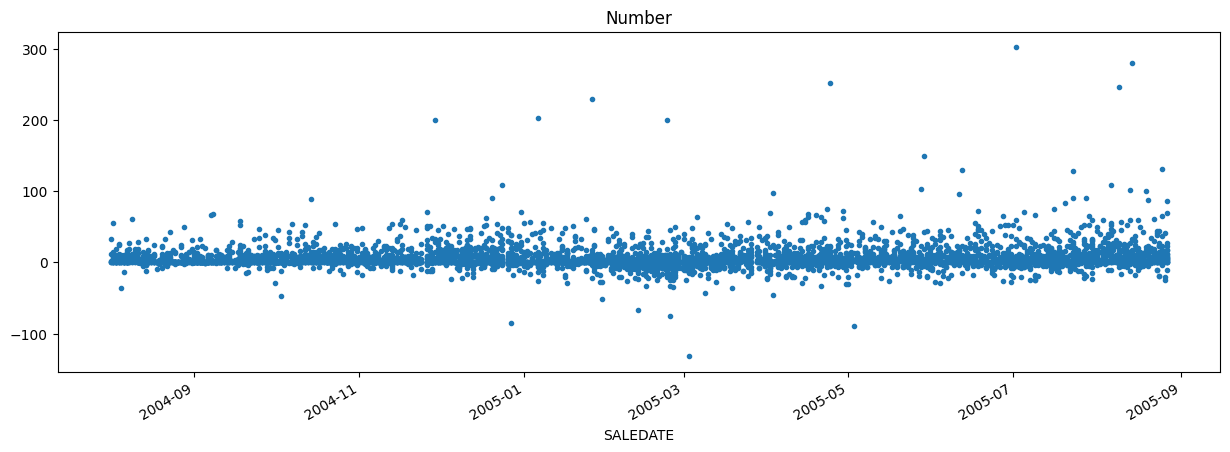

In [109]:
color_pal = sns.color_palette()
# set df index as date
df_ts = df_groupyed.set_index('SALEDATE')
df_ts.index = pd.to_datetime(df_ts.index)
# check distribution of revenue (no pattern found)
df_ts_draw = df_ts["REVENUE"]
df_ts_draw.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Number')
plt.show()


In [110]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofmonth'] = df.index.day
    return df
# create time series features
df_ts = create_features(df_ts)
df_ts

,STATE,SKU,STYPE_P,STYPE_R,AMT,REVENUE,DISCOUNT,hour,dayofweek,quarter,month,year,dayofmonth
SALEDATE,,,,,,,,,,,,,
2004-08-01,AL,2,1,1,43.49,2.15,-29.25,0,6,3,8,2004,1
2004-08-02,AL,1,1,0,24.99,0.00,0.00,0,0,3,8,2004,2
2004-08-03,AL,1,1,0,19.50,0.00,0.00,0,1,3,8,2004,3
2004-08-07,AL,3,3,0,102.00,9.25,0.00,0,5,3,8,2004,7
2004-08-10,AL,2,2,0,58.99,4.14,-19.50,0,1,3,8,2004,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-09,WY,1,1,0,6.00,3.90,0.00,0,5,2,4,2005,9
2005-04-22,WY,1,1,0,19.50,7.80,0.00,0,4,2,4,2005,22
2005-05-28,WY,1,1,0,21.50,0.00,0.00,0,5,2,5,2005,28


In [111]:
df_model = pd.DataFrame(columns = df_ts.columns)
def create_lag_feature(df):
    '''
    Create time lagging features
    '''
    df['AMT_1'] = df['AMT'].shift(1)
    df['AMT_3'] = df['AMT'].shift(3)
    df['AMT_6'] = df['AMT'].shift(6)
    df['REVENUE_1'] = df['REVENUE'].shift(1)
    df['REVENUE_3'] = df['REVENUE'].shift(3)
    df['REVENUE_6'] = df['REVENUE'].shift(6)
    df['DISCOUNT_1'] = df['DISCOUNT'].shift(1)
    df['DISCOUNT_3'] = df['DISCOUNT'].shift(3)
    df['DISCOUNT_6'] = df['DISCOUNT'].shift(6)
    return df

df_ts_lagged = create_lag_feature(df_ts)
df_ts_lagged
# for store in df_groupyed['STATE'].drop_duplicates().tolist():
#     df_part = df_groupyed[df_groupyed['STATE']==store]
#     df_model = df_model.append(create_lag_feature(df_part))
# df_ts_test

,STATE,SKU,STYPE_P,STYPE_R,AMT,REVENUE,DISCOUNT,hour,dayofweek,quarter,...,dayofmonth,AMT_1,AMT_3,AMT_6,REVENUE_1,REVENUE_3,REVENUE_6,DISCOUNT_1,DISCOUNT_3,DISCOUNT_6
SALEDATE,,,,,,,,,,,,,,,,,,,,,
2004-08-01,AL,2,1,1,43.49,2.15,-29.25,0,6,3,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,AL,1,1,0,24.99,0.00,0.00,0,0,3,...,2,43.49,NaN,NaN,2.15,NaN,NaN,-29.25,NaN,NaN
2004-08-03,AL,1,1,0,19.50,0.00,0.00,0,1,3,...,3,24.99,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN
2004-08-07,AL,3,3,0,102.00,9.25,0.00,0,5,3,...,7,19.50,43.49,NaN,0.00,2.15,NaN,0.00,-29.25,NaN
2004-08-10,AL,2,2,0,58.99,4.14,-19.50,0,1,3,...,10,102.00,24.99,NaN,9.25,0.00,NaN,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-09,WY,1,1,0,6.00,3.90,0.00,0,5,2,...,9,14.50,7.50,8.0,5.80,-4.00,0.0,0.00,-45.00,0.0
2005-04-22,WY,1,1,0,19.50,7.80,0.00,0,4,2,...,22,6.00,9.00,4.0,3.90,-6.00,4.5,0.00,-27.00,0.0
2005-05-28,WY,1,1,0,21.50,0.00,0.00,0,5,2,...,28,19.50,14.50,10.0,7.80,5.80,0.0,0.00,0.00,0.0


In [112]:
# one hot encoding for state variable
df_ts_lagged = pd.get_dummies(df_ts_lagged)
df_ts_lagged


,SKU,STYPE_P,STYPE_R,AMT,REVENUE,DISCOUNT,hour,dayofweek,quarter,month,...,STATE_NM,STATE_NV,STATE_OH,STATE_OK,STATE_SC,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WY
SALEDATE,,,,,,,,,,,,,,,,,,,,,
2004-08-01,2,1,1,43.49,2.15,-29.25,0,6,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-02,1,1,0,24.99,0.00,0.00,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-03,1,1,0,19.50,0.00,0.00,0,1,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-07,3,3,0,102.00,9.25,0.00,0,5,3,8,...,0,0,0,0,0,0,0,0,0,0
2004-08-10,2,2,0,58.99,4.14,-19.50,0,1,3,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-09,1,1,0,6.00,3.90,0.00,0,5,2,4,...,0,0,0,0,0,0,0,0,0,1
2005-04-22,1,1,0,19.50,7.80,0.00,0,4,2,4,...,0,0,0,0,0,0,0,0,0,1
2005-05-28,1,1,0,21.50,0.00,0.00,0,5,2,5,...,0,0,0,0,0,0,0,0,0,1


In [113]:
# convert data type for modeling
df_ts_lagged["STYPE_R"] = df_ts_lagged["STYPE_R"].astype(int)
df_ts_lagged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4949 entries, 2004-08-01 to 2005-08-24
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SKU         4949 non-null   int64  
 1   STYPE_P     4949 non-null   uint8  
 2   STYPE_R     4949 non-null   int64  
 3   AMT         4949 non-null   float64
 4   REVENUE     4949 non-null   float64
 5   DISCOUNT    4949 non-null   float64
 6   hour        4949 non-null   int64  
 7   dayofweek   4949 non-null   int64  
 8   quarter     4949 non-null   int64  
 9   month       4949 non-null   int64  
 10  year        4949 non-null   int64  
 11  dayofmonth  4949 non-null   int64  
 12  AMT_1       4948 non-null   float64
 13  AMT_3       4946 non-null   float64
 14  AMT_6       4943 non-null   float64
 15  REVENUE_1   4948 non-null   float64
 16  REVENUE_3   4946 non-null   float64
 17  REVENUE_6   4943 non-null   float64
 18  DISCOUNT_1  4948 non-null   float64
 19  DISCOUNT_

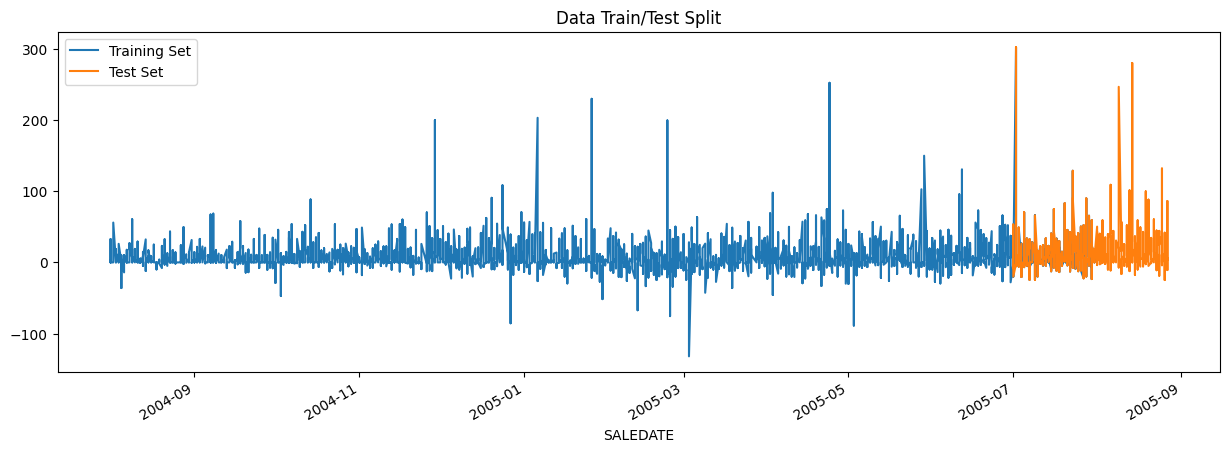

In [114]:
df_ts = df_ts_lagged
# train_test split
train = df_ts.loc[df_ts.index < '08-01-2005']
test = df_ts.loc[df_ts.index >= '07-01-2005']
# plot the train test dataset
train_ts_draw = train["REVENUE"]
test_ts_draw = test["REVENUE"]
fig, ax = plt.subplots(figsize=(15, 5))
train_ts_draw.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [115]:
# split the data with labels
X_train = train.drop('REVENUE', axis = 1)
y_train = train['REVENUE']
X_test = test.drop('REVENUE', axis = 1)
y_test = test['REVENUE']

In [116]:
# tune the XGBoost model
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 400)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train,verbose=100)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [95]:
# try xgboost regressor model
import xgboost as xgb
reg_tuned = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       colsample_bytree = 0.3,
                       n_estimators=500,
                       objective='reg:squarederror',
                       max_depth=6,
                       learning_rate=0.05)
reg_tuned.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:16.76749	validation_1-rmse:25.86233
[100]	validation_0-rmse:8.02042	validation_1-rmse:18.01912
[200]	validation_0-rmse:6.01815	validation_1-rmse:17.52195
[300]	validation_0-rmse:4.97374	validation_1-rmse:17.37082
[400]	validation_0-rmse:4.31780	validation_1-rmse:17.24730
[499]	validation_0-rmse:3.84813	validation_1-rmse:17.19953


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

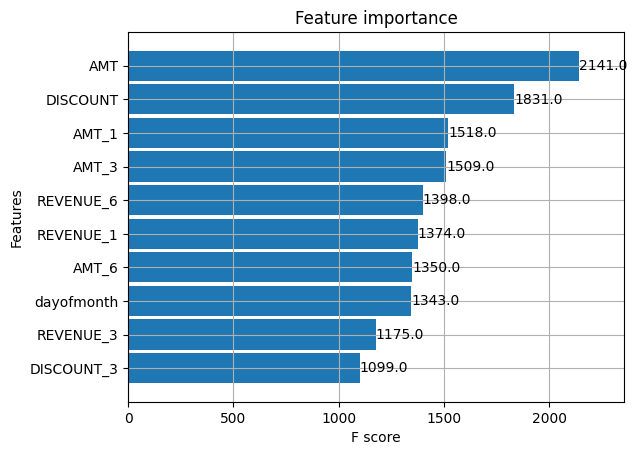

In [96]:
from xgboost import plot_importance, plot_tree
# get the variable importance of XGboost model
# plot_importance(reg,max_num_features=10,height=0.9)
plot_importance(reg_tuned,max_num_features=10,height=0.9)



In [98]:
# do the prediction
y_pred = reg_tuned.predict(X_test)
X_test['prediction'] = y_pred
test_pred = pd.concat([X_test, X_train], sort=False)

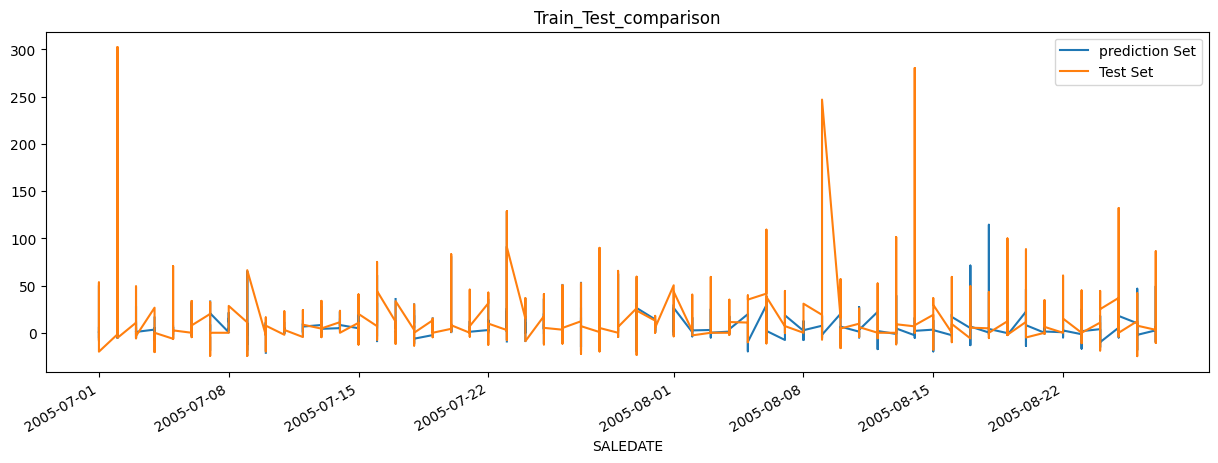

In [100]:
# graph the distribution of prediction vs actual
test_ts_draw = test["REVENUE"]
test_prediction = test_pred["prediction"]
fig, ax = plt.subplots(figsize=(15, 5))
test_prediction.plot(ax=ax, label='prediction Set', title='Train_Test_comparison')
test_ts_draw.plot(ax=ax, label='Test Set')
ax.legend(['prediction Set', 'Test Set'])
plt.show()

In [101]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [102]:
regression_results(y_test, y_pred)

explained_variance:  0.5244
r2:  0.4926
MAE:  6.8519
MSE:  295.824
RMSE:  17.1995
